In [14]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
import math
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
# if i will have a 30 second 30 second split between what the fish sees, i need also a 15 sec 30 sec 15 sec version of data analysis, so i can see nicely the before and after!

In [27]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_forward_sine_45_plaid_45\data_combined_checked.hdf5")
print('done all data')
df_index =df.reset_index()

done all data


In [28]:
len(df)

204213

In [31]:
df_index['stimulus_name'].unique()

array(['0_plaid_-45', '0_plaid_0', '0_plaid_45', '45_plaid_0'],
      dtype=object)

In [4]:
df1 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df2 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed.hdf5")

frames = [df1, df2]
result = pd.concat(frames)
result.to_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed_concat.hdf5", key="all_events", complevel=9)

C:\Users\ag-bahl\AppData\Local\Temp\ipykernel_28448\749715083.py:6: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['folder_name', 'fish_genotype', 'fish_age', 'stimulus_name',
       'start_time', 'start_contour_area', 'start_x_position',
       'start_y_position', 'start_accumulated_path',
       'start_accumulated_orientation',
       'start_accumulated_orientation_windowed_variance', 'end_time',
       'end_contour_area', 'end_accumulated_path',
       'end_accumulated_orientation',
       'end_accumulated_orientation_windowed_variance', 'duration',
       'x_position_change', 'y_position_change', 'distance_change',
       'estimated_orientation_change', 'average_speed', 'interbout_interval',
       'same_direction_as_previous_bout', 'time', 'fish_name'],
      dtype='object')]

  result.to_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed_conc

In [ ]:
result

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
g_Na_list = np.array(g_na_values)
g_K_list = np.array(g_k_values) #np.logspace(np.log10(1), 3)

for Ion_Concentration in Ion_Concentrations:
    label = Ion_Concentration.pop('label')
    axs[0].plot(g_Na_list, 1e3*vm_goldmann(g_Na=g_Na_list, **Ion_Concentration), 'o', label=label)
    axs[1].plot(g_K_list, 1e3*vm_goldmann(g_K=g_K_list, **Ion_Concentration), 'o', label=label)

axs[0].semilogx()
axs[0].set_ylabel("$V_m (mV)$")
axs[0].set_title("$V_m$ with increasing $g_{Na}$")
axs[0].set_xlabel("$g_{Na}$")
axs[0].set_ylim(-100, 100)
axs[0].grid()
axs[0].legend()

axs[1].semilogx()
axs[1].set_ylabel("$V_m (mV)$")
axs[1].set_title("$V_m$ with increasing $g_{K}$")
axs[1].set_xlabel("$g_{K}$")
axs[1].set_ylim(-100, 100)
axs[1].grid()
axs[1].legend()

fig.tight_layout()

In [ ]:
df

In [ ]:
# this includes where are the higher streak length happening, where is the fish(on average) during high vs low streak lengths? during gray vs stimulus?
# ...

In [ ]:
# subseter once again
def subseter(dfs):
    # it can be separate dfs, maybe thats bettER! so for each i can calculate

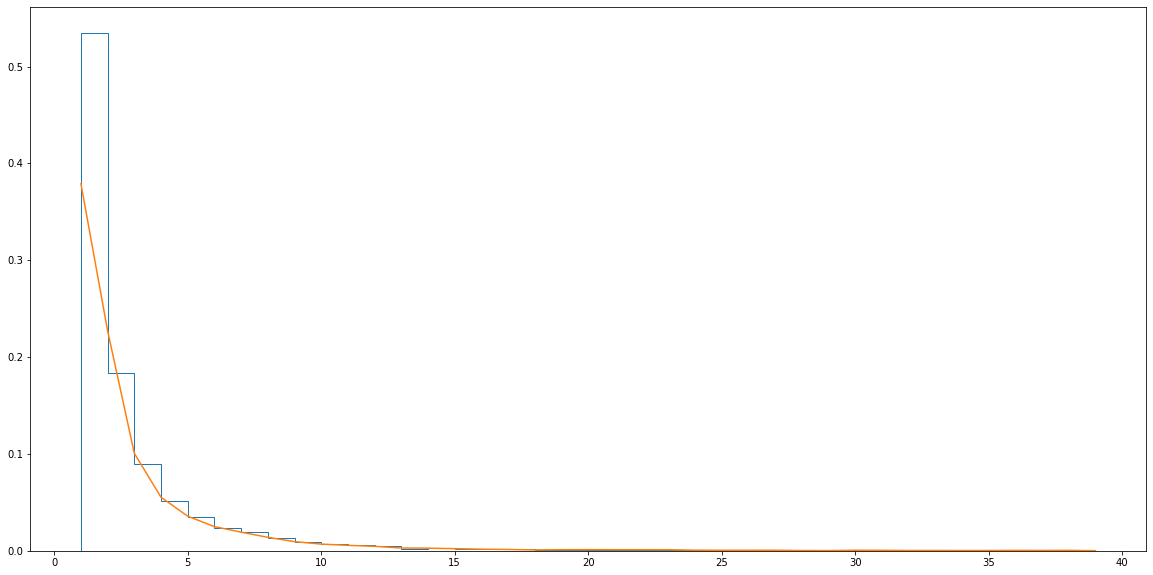

In [15]:
# general?
list_of_directions = df['bout_orientation']
def streak_length(list_of_directions):
    list_of_streaks = [] # i save here the length of the streak, defined as a_streak
    a_streak = 1 # we keep track of each streak length here, and when the streak is done, we append it to the list_of_streaks. streak length is 1 if only one bout was done in that direction
    for element in range(1,len(list_of_directions)): # we start from one bcs we compare with 0th element
        if list_of_directions[element-1]==list_of_directions[element]:
            a_streak += 1
        else:
            list_of_streaks.append(a_streak)
            a_streak = 1
    list_of_streaks.append(a_streak)
    list_of_streaks = [x for x in list_of_streaks if x <= 40]
    return list_of_streaks
plt.rcParams["figure.figsize"] = (20,10)
#plt.hist(streak_length(list_of_directions),bins = 20)
#plt.show()
x_bar = streak_length(list_of_directions)
density = stats.gaussian_kde(x_bar)
n, x, _ = plt.hist(x_bar, bins=np.arange(1, 40,1 ), histtype=u'step', density=True)
plt.plot(x, density(x))
plt.show()

(array([6393.,  681.,  195.,   55.,   37.,   34.,   12.,   13.,   11.,
          13.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

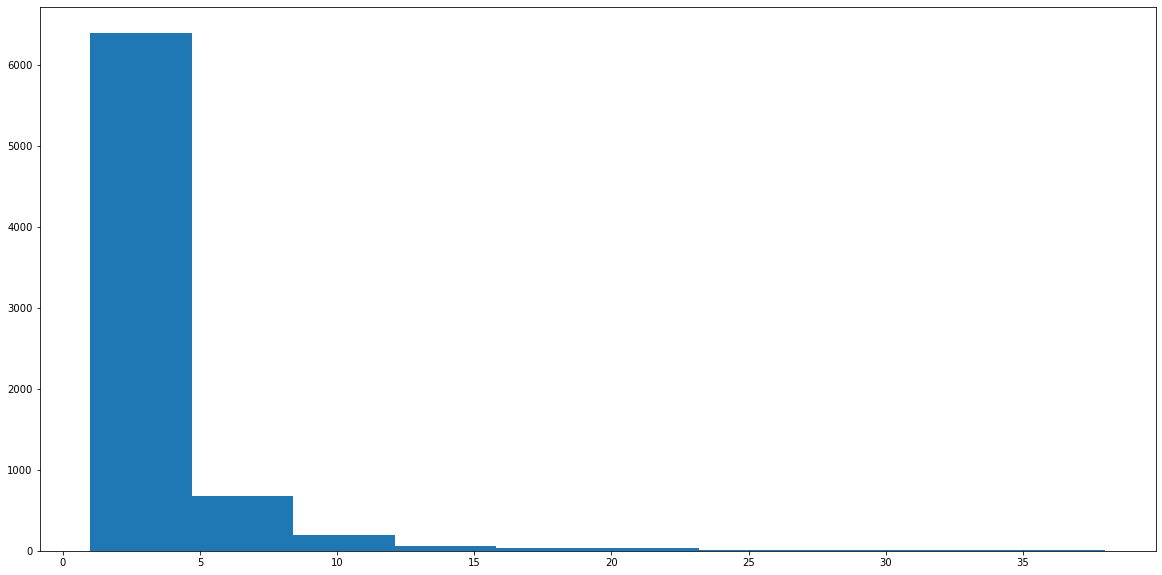

In [16]:
plt.hist(x_bar)

bout sample size: 20276
fish sample size: 8


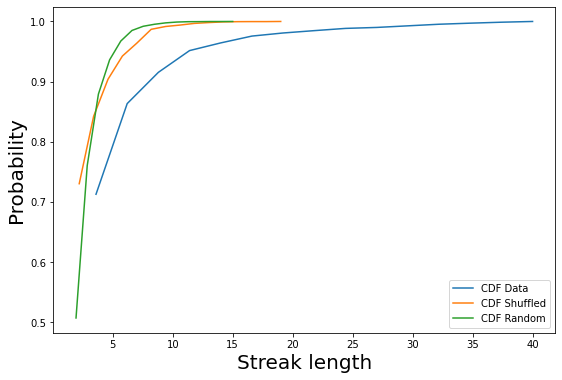

In [17]:
def c_p(list_of_directions,title):
    data_ls = streak_length(list_of_directions)
    count, bins_count = np.histogram(data_ls, bins=15)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label=title)

def cdf_pdf(df):
    list_of_directions = df['bout_orientation_absolute'].tolist()
    print('bout sample size: '+str(len(list_of_directions)))
    print('fish sample size: '+str(len(df['fish_ID'].unique().tolist())))
    c_p(list_of_directions,title = 'CDF Data')

    shuffled_ls = random.sample(list_of_directions, len(list_of_directions))
    c_p(shuffled_ls,title = 'CDF Shuffled')

    rand_ls = np.random.randint(2, size=len(list_of_directions))
    c_p(rand_ls,title = 'CDF Random')

  #   plotting PDF and CDF
  #  plt.plot(bins_count[1:], pdf, color="red", label="PDF")
   # plt.title('Grey eight directions  - Cumulative Probability distribution of streak lengths',size = 20)
    plt.xlabel('Streak length',size = 20)
    plt.ylabel('Probability', size =20)
    plt.legend()
    plt.show()

  #  return cdf_r,pdf_r, bins_count_r[1:]
plt.rcParams["figure.figsize"] = (9,6)
cdf_pdf(df)

In [66]:
# line histogram function
def line_hist(list_of_directions):
    print('bout sample size: '+str(len(list_of_directions)))
    print('fish sample size: '+str(len(df['fish_ID'].unique().tolist())))
    real_data = streak_length(list_of_directions)
    shuffled_ls = random.sample(list_of_directions, len(list_of_directions))
    shuffle_data = streak_length(shuffled_ls)
    rand_ls = np.random.randint(2, size=len(list_of_directions))
    rand_data = streak_length(rand_ls)
    lsls = [rand_data,shuffle_data, real_data]
    leg = ['rand_data','shuffle_edata', 'real_data']
    for x_bar in range(3):
     #   density = stats.gaussian_kde(x_bar) # density has to sum to one????????????????????????
     #   n, x, _ = plt.hist(x_bar, bins=np.arange(1, 40,1 ), histtype=u'step', density=True)
     #   plt.plot(x, density(x))
        plt.hist(lsls[x_bar],histtype=u'step', bins = np.arange(-2,30,1),linewidth = 3, label = leg[x_bar])
    plt.xlabel('Streak length',size = 20)
    plt.ylabel('Probability', size =20)
    plt.legend()
    plt.show()


In [68]:
df

,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,radius,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,ring_membership
0,5156,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.680450,6.741165,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
1,5157,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.689678,8.552262,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
2,5158,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.739272,12.607784,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
3,5159,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.758108,13.196668,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
4,5160,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.786610,13.729997,0.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631920,806736,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.911741,32.661875,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,8.0
631921,806737,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.911823,33.250759,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0
631922,806738,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.912315,33.572979,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,8.0
631923,806739,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.914938,34.184085,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0


bout sample size: 153795
fish sample size: 106


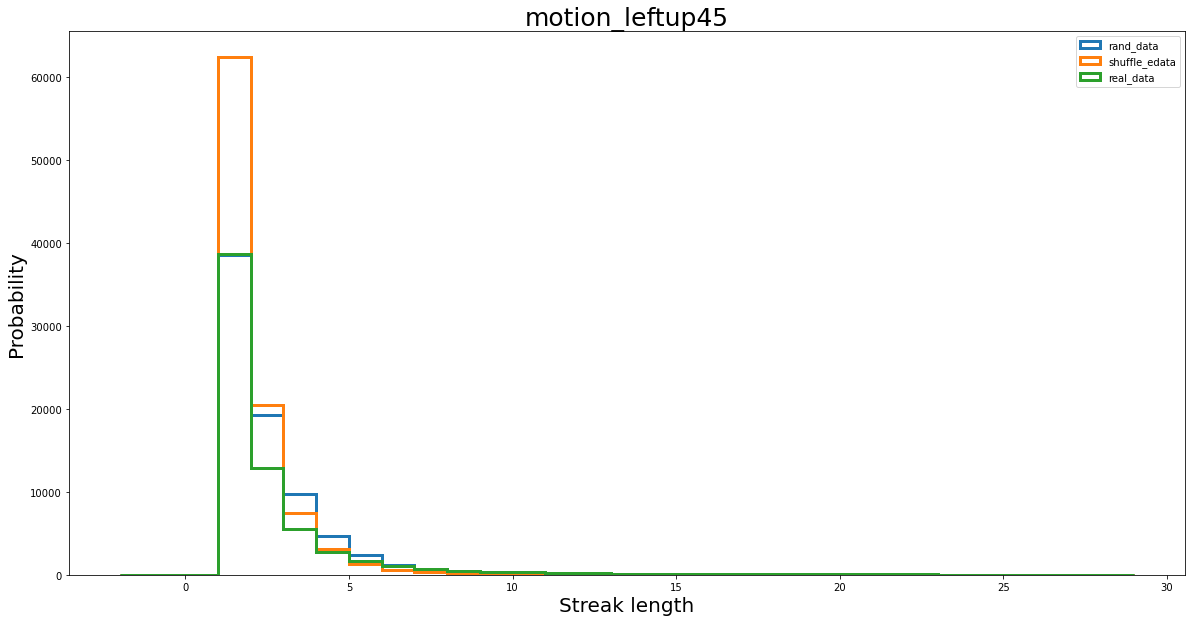

bout sample size: 121615
fish sample size: 106


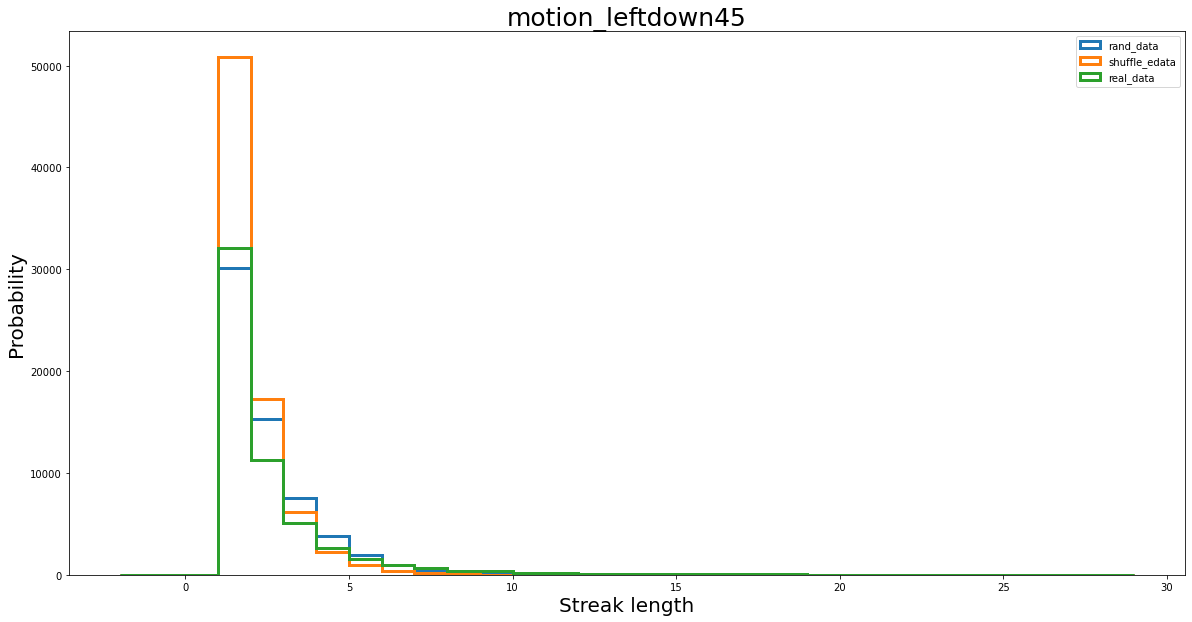

bout sample size: 153739
fish sample size: 106


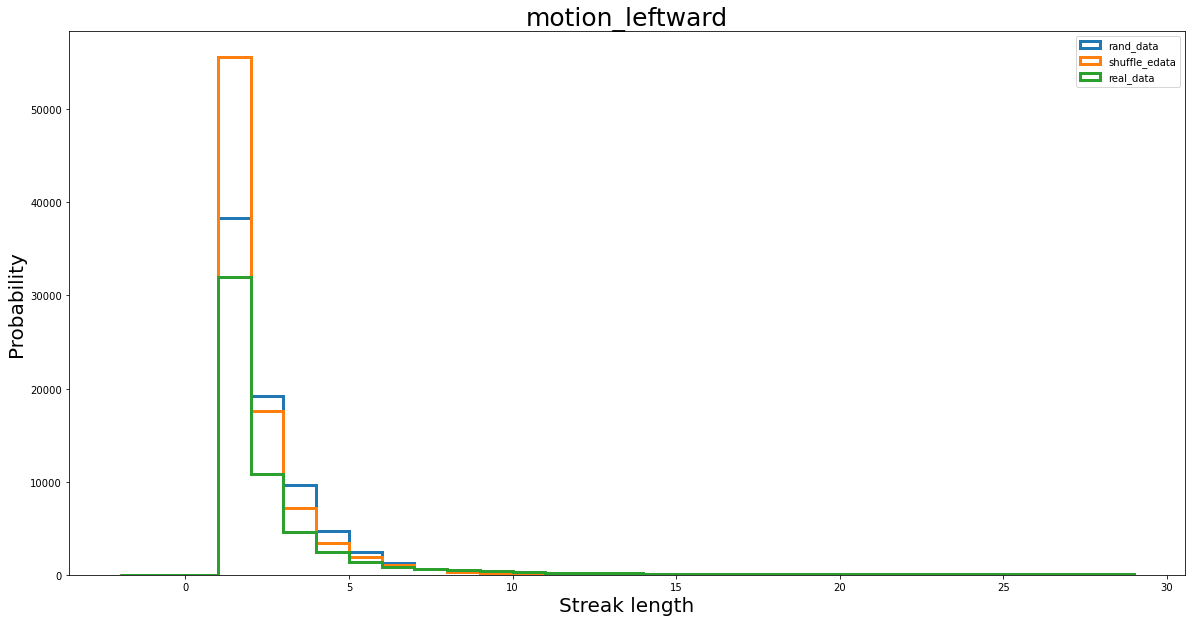

bout sample size: 56351
fish sample size: 106


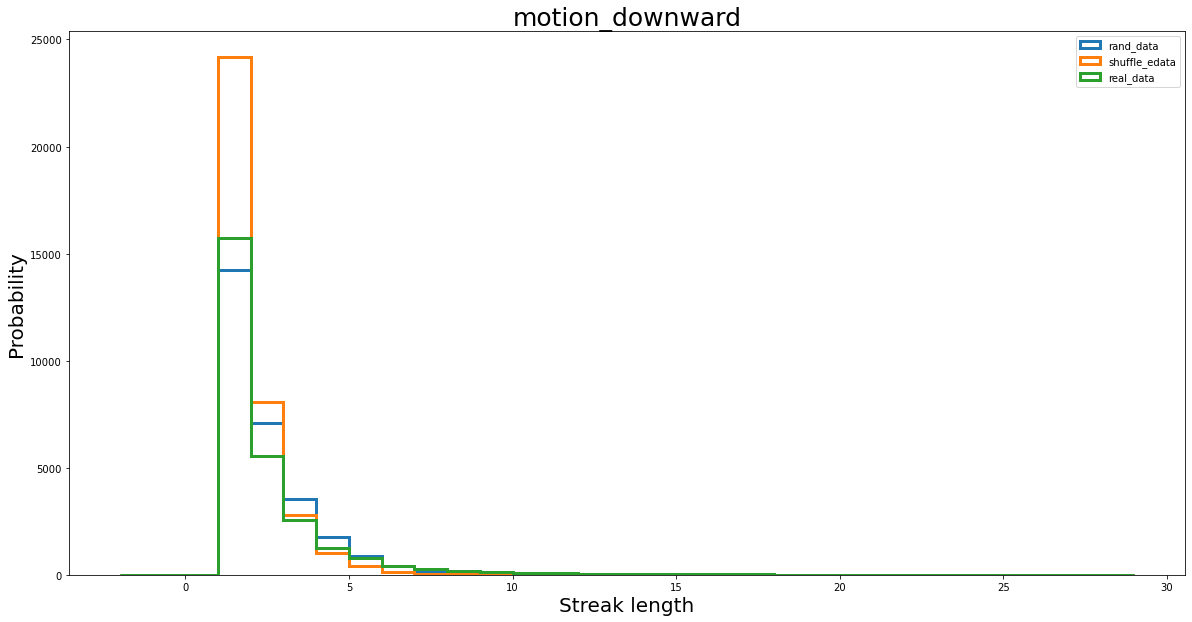

bout sample size: 71044
fish sample size: 106


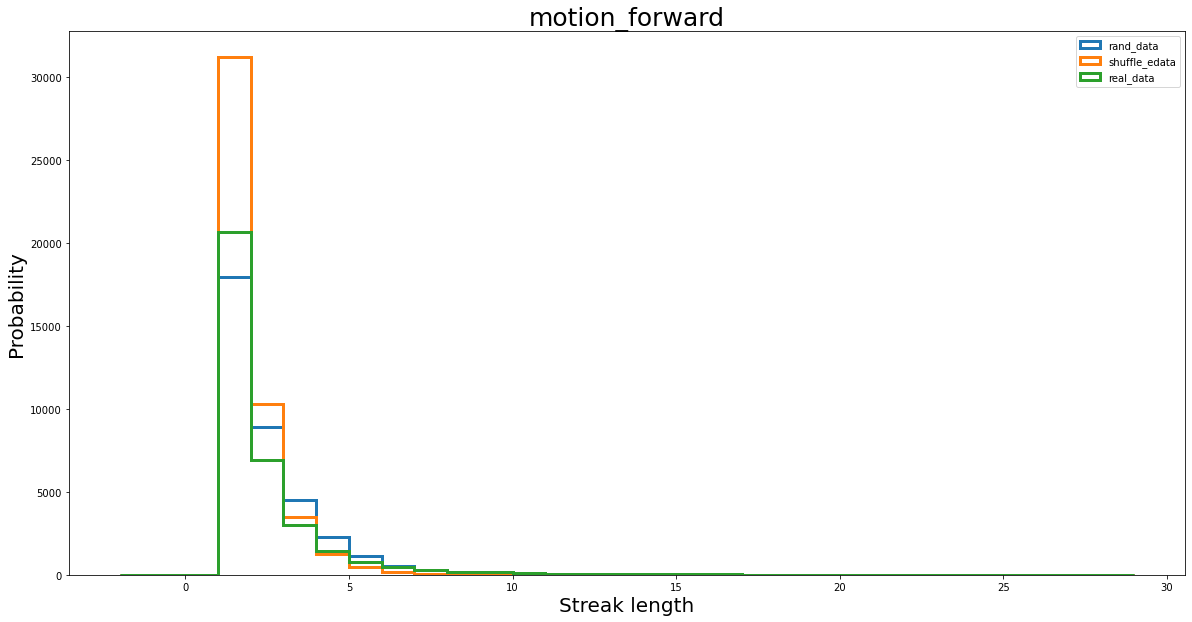

bout sample size: 75381
fish sample size: 106


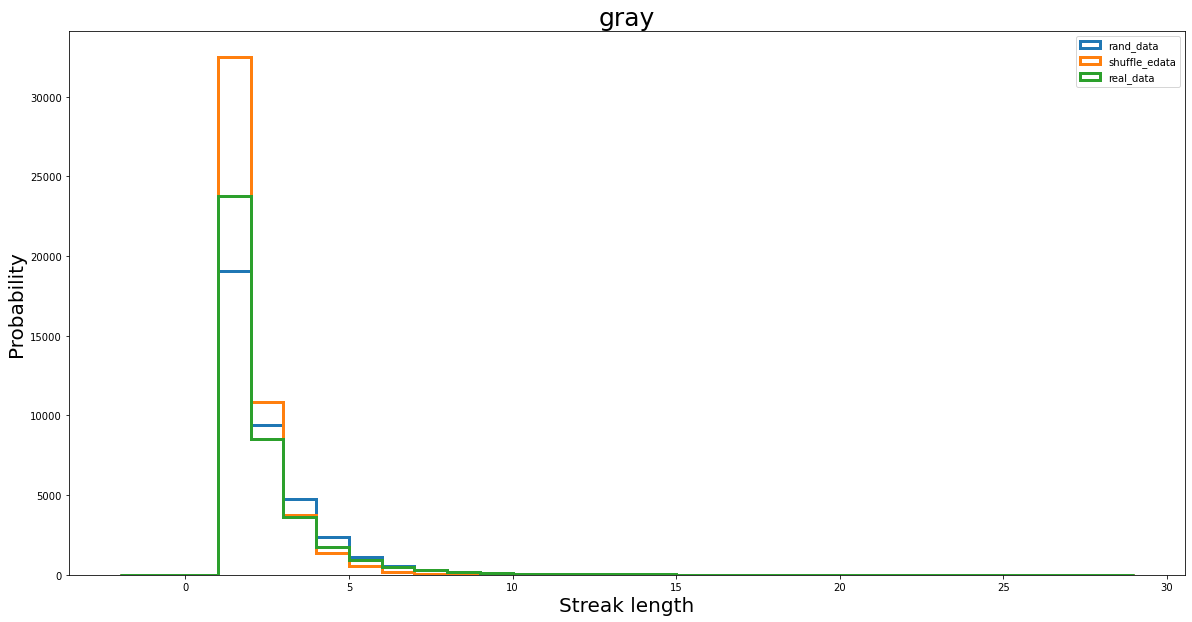

In [67]:
def subset_dfs(df):
    list_dfs = []
    list_dfs_str = df['stimulus_name'].unique().tolist() # for every stimulus
    for i in list_dfs_str:
        subset = df[df['stimulus_name'] == i]
        list_of_directions = subset['bout_orientation'].tolist()
        plt.title(i,size = 25)
        line_hist(list_of_directions)
      #  plt.show()

subset_dfs(df) # i get a probability of 2 somehow??? does not sum to one anywhere lol...

bout sample size: 7124
fish sample size: 8


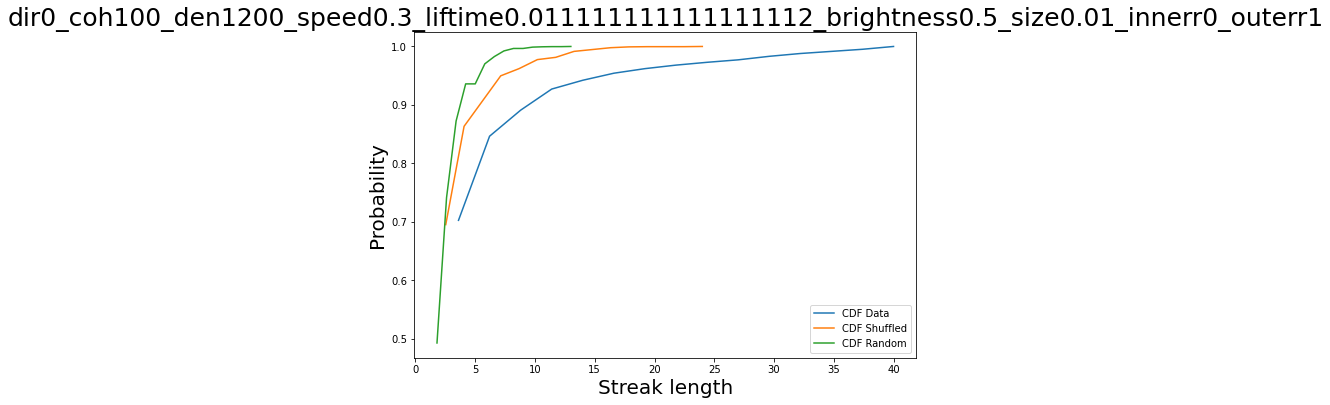

bout sample size: 6574
fish sample size: 8


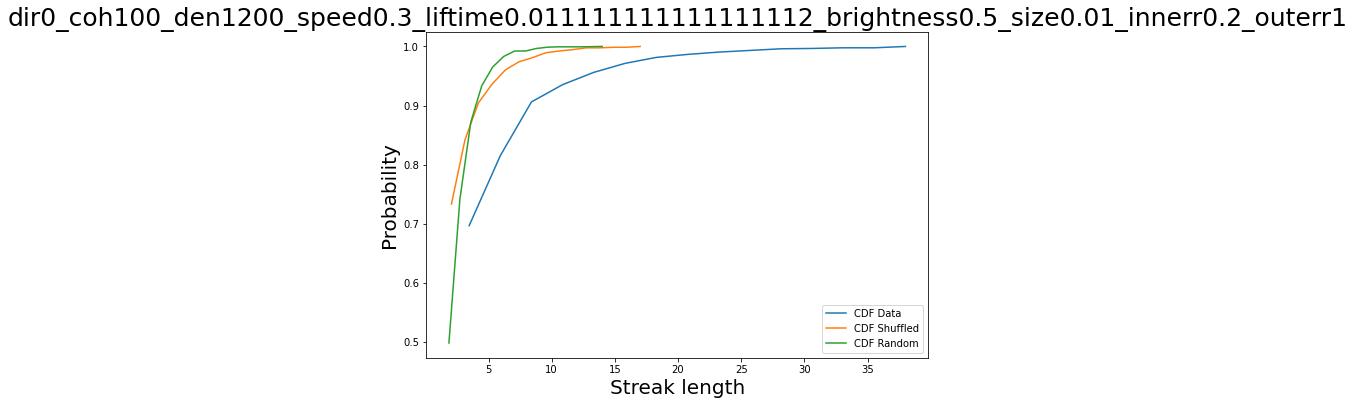

bout sample size: 6578
fish sample size: 8


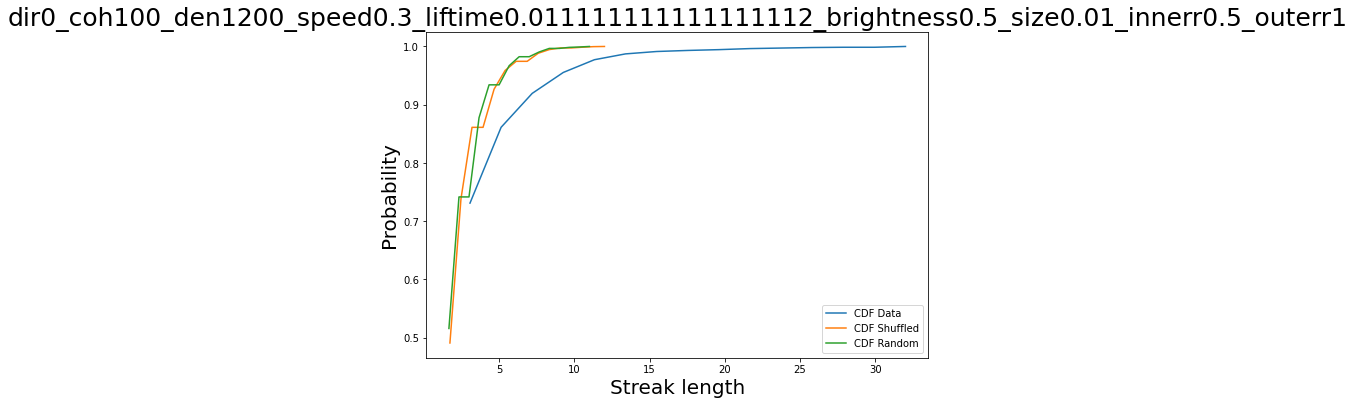

In [18]:
def subset_dfs(df):
    list_dfs = []
    list_dfs_str = df['stimulus_name'].unique().tolist()
    for i in list_dfs_str:
        subset = df[df['stimulus_name'] == i]
        plt.title(i,size = 25)
        cdf_pdf(subset)
subset_dfs(df)

<class 'numpy.ndarray'>
(1000,)
1000


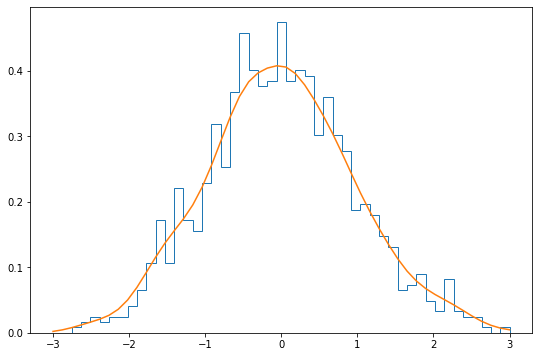

In [18]:
# make a stupid function here that plots the distribution histograms togeterh as lines!!
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
noise = np.random.normal(0, 1, (1000, ))

print(type(noise))
print(np.shape(noise))
print(len(noise))
density = stats.gaussian_kde(noise)

n, x, _ = plt.hist(noise, bins=np.linspace(-3, 3, 50), histtype=u'step', density=True)

plt.plot(x, density(x))

plt.show()

In [ ]:
# this and below is to be done after monday!
df # add column : 1,2,3 - first grey, sine grating, second grey,
def separator(df):
    sep_list = []
    for i in tqdm(range(0,len(df))):
        if ((df['time'][i]<10) or  (df['time'][i]>40)):
            sep_list.append(1)
        elif ((df['time'][i]>10) and (df['time'][i]<40)):
            sep_list.append(2)
        else:
            sep_list.append(0)
    df['separator'] = sep_list
    print('done separator')
    return df
df =separator(df_sub)

In [ ]:
# strike length through time and other things lol!. First i can just separate into windows and have the trials be independent, no need for a list lol?
# or first i can say only in 10 second bins, then we see...

In [ ]:
df # then go through time, start_time or whatever! and create 5 dataframes, 10 seconds each. hoping but checking also that the order is not lost. that should be it lol!  then calculate the area or watever...


In [ ]:
list_of_directions = df['bout_orientation_absolute']
def streak_length_10_sec_bin(list_of_directions):
    list_of_streaks = [] # i save here the length of the streak, defined as a_streak
    a_streak = 1 # we keep track of each streak length here, and when the streak is done, we append it to the list_of_streaks. streak length is 1 if only one bout was done in that direction
    for element in range(1,len(list_of_directions)): # we start from one bcs we compare with 0th element
        if list_of_directions[element-1]==list_of_directions[element]:
            a_streak += 1
        else:
            list_of_streaks.append(a_streak)
            a_streak = 1
    list_of_streaks.append(a_streak)
    list_of_streaks = [x for x in list_of_streaks if x <= 20]
    return list_of_streaks
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(streak_length(list_of_directions),bins = 20)
plt.show()

In [ ]:
# less response in grey in general. oH Noh...
plt.rcParams["figure.figsize"] = (12,8)


In [ ]:
# streak length analysis through time
